In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

C:\Users\1-22-11619\AppData\Local\Temp\ipykernel_11752\362332235.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:

# Define os nomes das colunas e as larguras de cada campo
colspecs = [(2, 10), (10, 22), (56, 69), (82, 95)]
names = ['Data', 'Codigo', 'Preco_Abertura', 'Preco_Fechamento']

# Carrega o arquivo
df = pd.read_fwf('COTAHIST_A2023.TXT', colspecs=colspecs, names=names, header=None)

# Filtra pela ação do banco BRB (patrocinador omoplata do Flamengo), garantindo que seja exatamente BRB (sem caracteres adicionais)
BRB_2023_df = df[df['Codigo'].str.endswith('BSLI3')]

BRB_2023_df.head(50)

,Data,Codigo,Preco_Abertura,Preco_Fechamento
5170,20230105,02BSLI3,1793.0,1793.0
18153,20230117,02BSLI3,1621.0,1621.0
23047,20230120,02BSLI3,1792.0,1656.0
24855,20230123,02BSLI3,1793.0,1793.0
26473,20230124,02BSLI3,1780.0,1780.0
32889,20230130,02BSLI3,1677.0,1677.0
34430,20230131,02BSLI3,1601.0,1581.0
36122,20230201,02BSLI3,1576.0,1540.0
37819,20230202,02BSLI3,1540.0,1399.0
39726,20230203,02BSLI3,1514.0,1495.0


C:\Users\1-22-11619\AppData\Local\Temp\ipykernel_11752\1764660643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BRB_2023_df['Data'] = pd.to_datetime(BRB_2023_df['Data'], format='%Y%m%d')
C:\Users\1-22-11619\AppData\Local\Temp\ipykernel_11752\1764660643.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BRB_2023_df['Ano'] = BRB_2023_df['Data'].dt.year
C:\Users\1-22-11619\AppData\Local\Temp\ipykernel_11752\1764660643.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

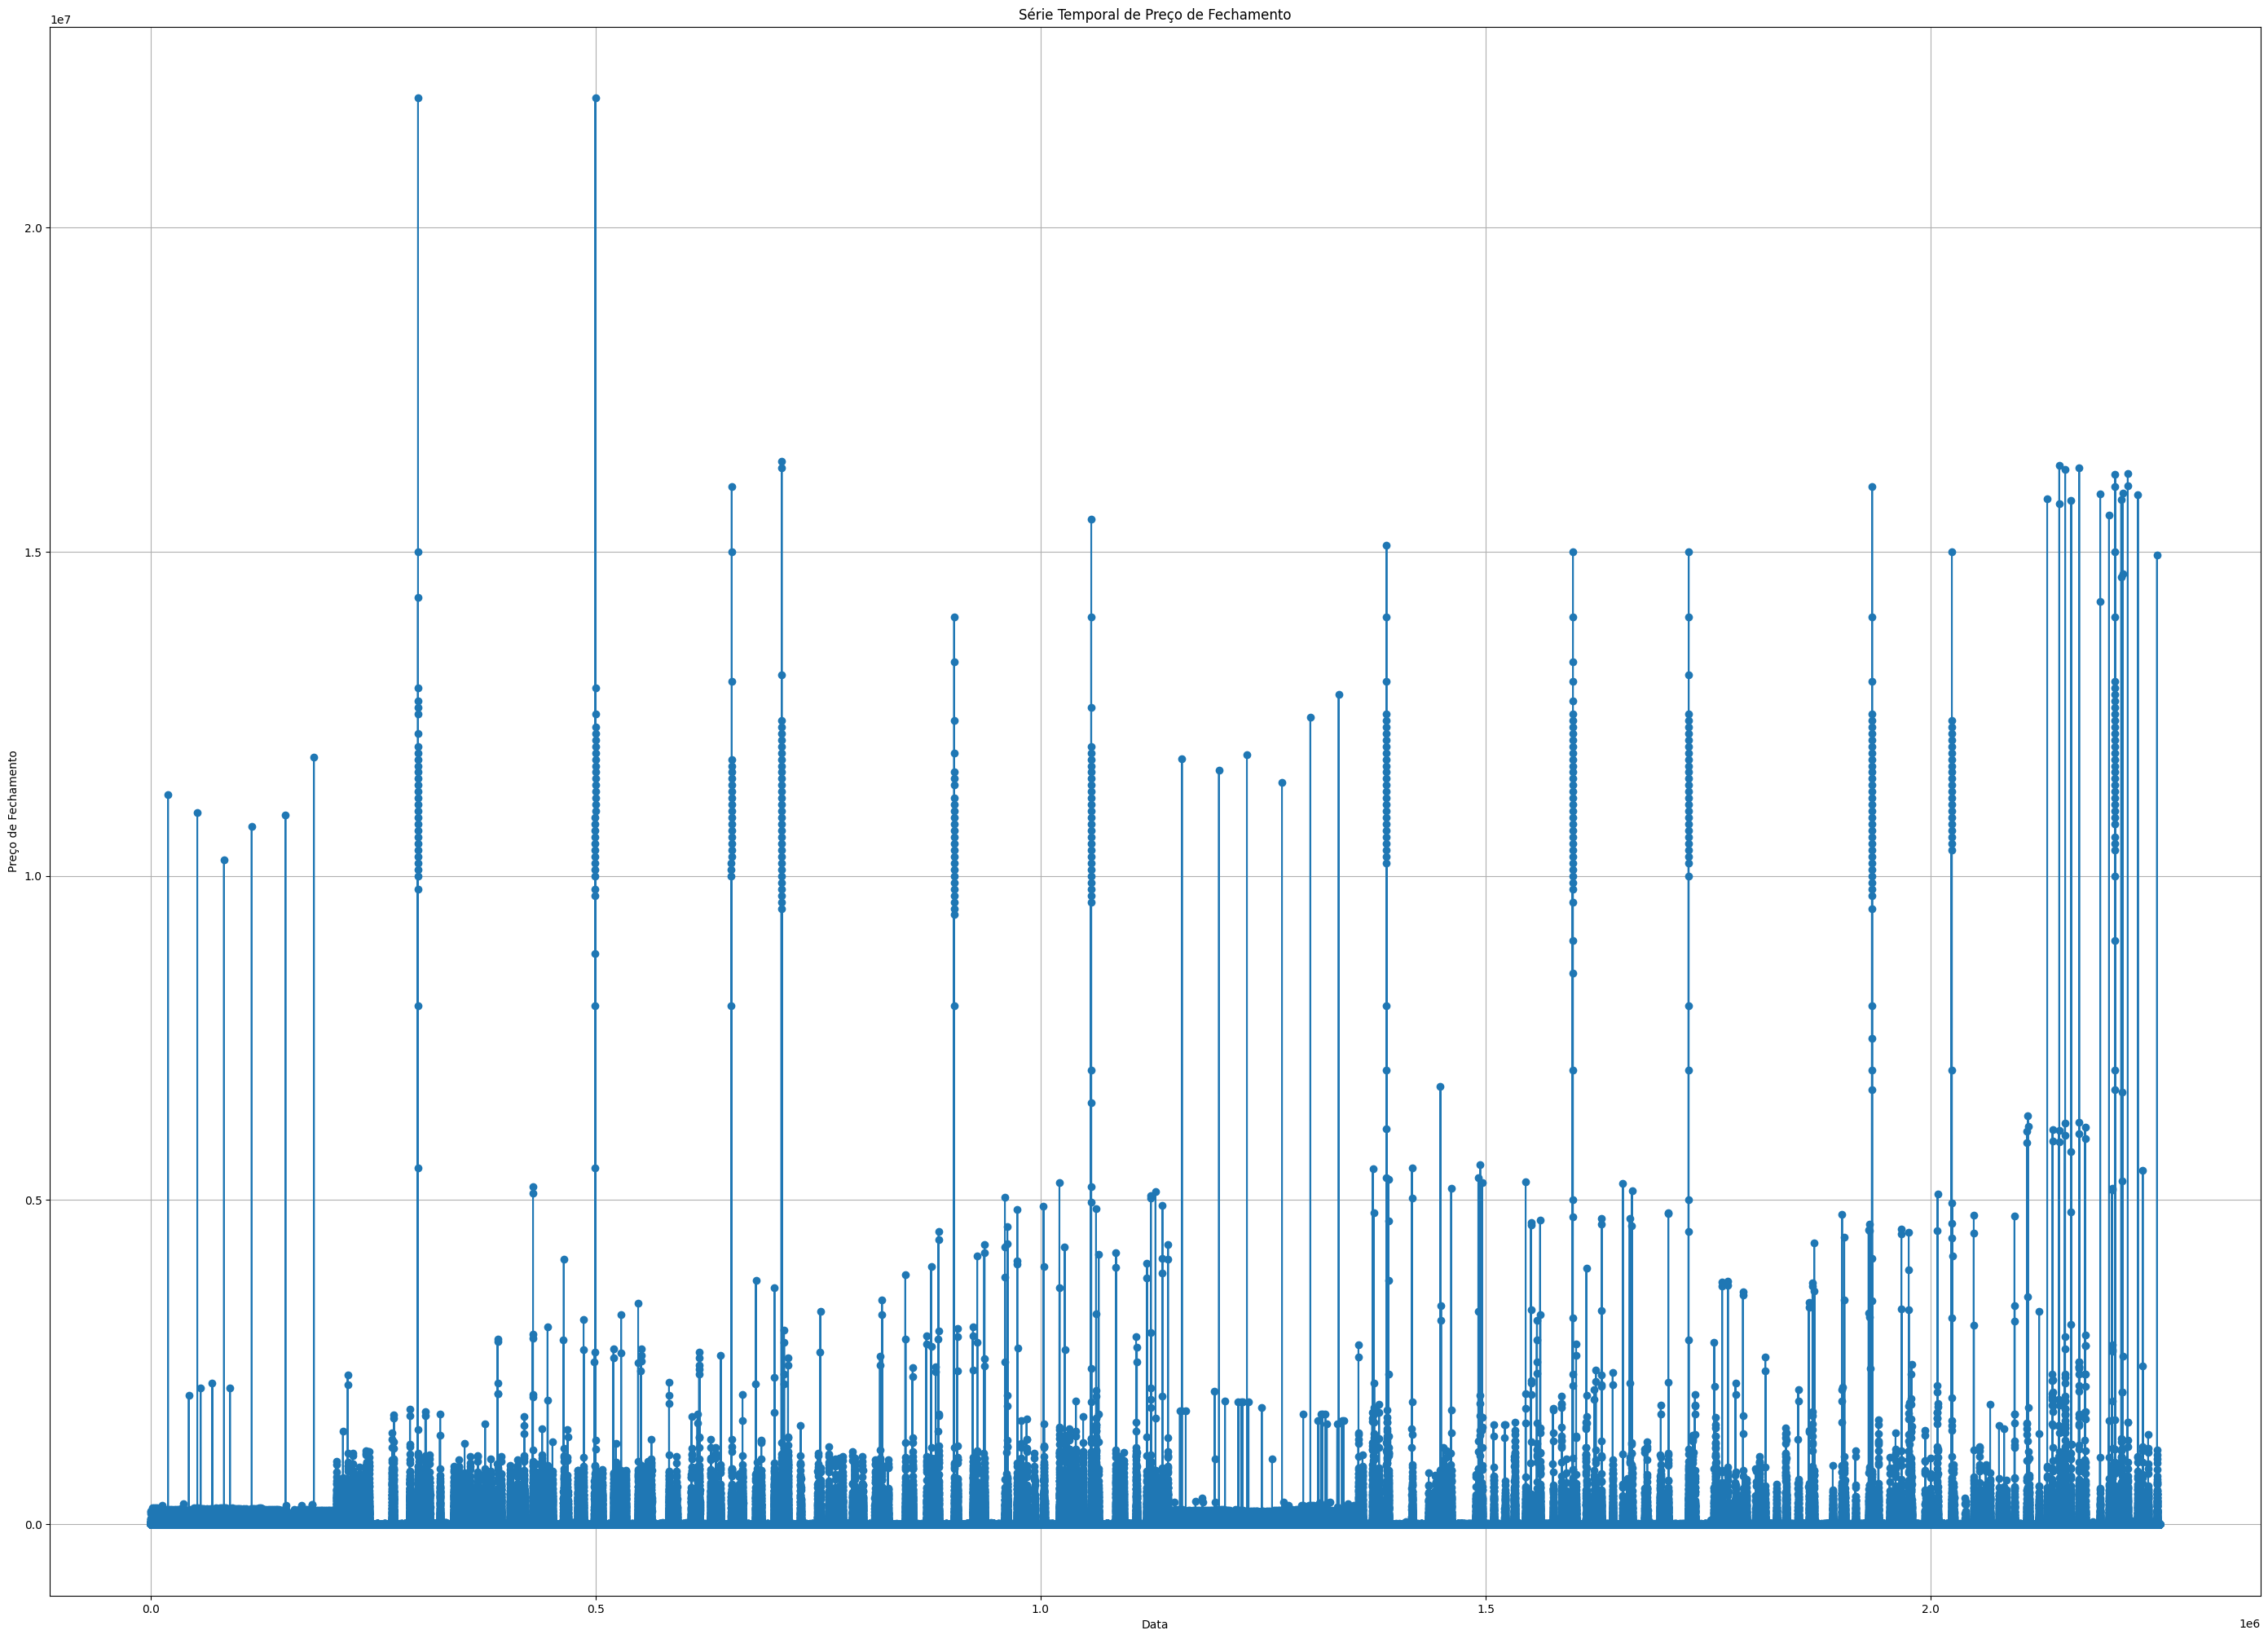

In [3]:
# Convertendo a coluna 'Data' para datetime
BRB_2023_df['Data'] = pd.to_datetime(BRB_2023_df['Data'], format='%Y%m%d')

# Extraindo ano, mês e dia
BRB_2023_df['Ano'] = BRB_2023_df['Data'].dt.year
BRB_2023_df['Mes'] = BRB_2023_df['Data'].dt.month
BRB_2023_df['Dia'] = BRB_2023_df['Data'].dt.day

plt.figure(figsize=(35, 25))
plt.plot(df.index, df['Preco_Fechamento'], marker='o')
plt.title('Série Temporal de Preço de Fechamento')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.grid(True)
plt.show()

In [4]:
modelo = ARIMA(BRB_2023_df['Preco_Fechamento'], order=(9,1,5))
modelo_ajustado = modelo.fit()
previsoes = modelo_ajustado.forecast(steps=12)  

C:\Users\1-22-11619\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\1-22-11619\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\1-22-11619\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\1-22-11619\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\1-22-11619\AppData\Roaming\Py

C:\Users\1-22-11619\AppData\Local\Temp\ipykernel_11752\2975019688.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datas_previsao = pd.date_range(start=proximo_dia, periods=12, freq='M')


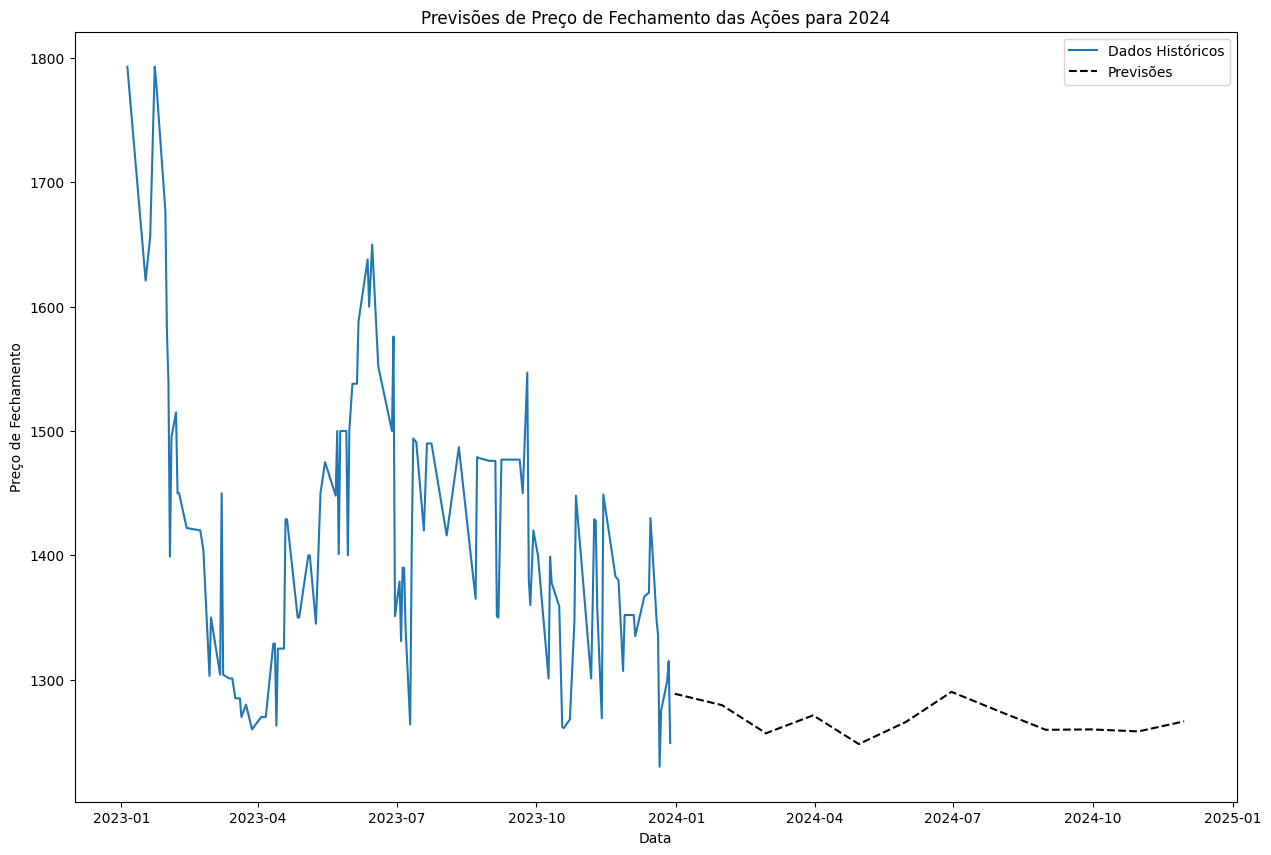

In [5]:
# Definindo o tamanho da figura
plt.figure(figsize=(15, 10)) 

# Plotando os dados históricos
plt.plot(BRB_2023_df['Data'], BRB_2023_df['Preco_Fechamento'], label='Dados Históricos')

# Plotando as previsões
ultimo_dia_historico = BRB_2023_df['Data'].iloc[-1]
proximo_dia = ultimo_dia_historico + pd.Timedelta(days=1)
datas_previsao = pd.date_range(start=proximo_dia, periods=12, freq='M')
plt.plot(datas_previsao, previsoes, color='black', linestyle='--', label='Previsões')

# Configurando o título e legendas
plt.title('Previsões de Preço de Fechamento das Ações para 2024')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()

# Exibindo o gráfico
plt.show()